1. Descriptive Statistics: Measure of central tendency and dispersion.

2. Correlation analysis: Pearson correlation, Rank correlation, Spurious correlation

In [13]:
# Libraries & Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wn
wn.filterwarnings(
    action='ignore'
)

In [8]:
df = pd.read_csv('liverpatients.csv') 
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


****TB - Total Bilirubin**** is a combination of direct and indirect bilirubin. Typically, you'll get results for direct and total bilirubin. 

****DB - Direct Bilirubin**** - Higher levels of direct bilirubin in your blood may indicate your liver isn't clearing bilirubin properly

****Alkphos - Alkaline Phosphatase**** -  Test measures the level of ALP in your blood. ALP is an enzyme found in many tissues in the body, including the liver. Abnormal ALP levels can indicate a number of health conditions, including liver disease.

****Sgpt - Alanine Aminotransferase (ALT)**** test measures the level of ALT in your blood. ALT is an enzyme that helps the liver convert food into energy

****Sgot - Aspartate Aminotransferase (AST)**** test, is a blood test that measures the level of the AST enzyme in your blood. This test is used to assess liver health and can help diagnose liver ailments and damage.

****TP - A total protein (TP)**** test measures the amount of albumin and globulin in your blood. Proteins are important for the health of your cells and tissues. A TP test can help diagnose a number of health conditions, including kidney and liver disease, as well as nutritional deficiencies. 

****ALB - Albumin****, which is a protein produced by the liver that helps maintain fluid balance in the body. This test can help indicate liver and kidney function. Low albumin levels can be a sign of liver or kidney disease, inflammation, or infections.

****A/G Ratio - Albumin/Globulin Ratio****, is a measurement of the amount of albumin compared to globulin in your blood. It's a part of a total protein test that measures the levels of proteins in your blood.

****Liver_Problem****,  is the target variable used to divide groups into liver patient ( Liver_Problem == 1) or not ( Liver_Problem == 2).
Liver_Problem == 1, implies the individual is a liver patient
Liver_Problem == 2, implies the individual is not a liver patient

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alanine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Liver_Problem               583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [10]:
df.nunique()

Age                            72
Gender                          2
Total_Bilirubin               113
Direct_Bilirubin               80
Alkaline_Phosphotase          263
Alanine_Aminotransferase      152
Aspartate_Aminotransferase    177
Total_Protiens                 58
Albumin                        40
Albumin_and_Globulin_Ratio     69
Liver_Problem                   2
dtype: int64

In [21]:
df_null_values = df.isnull().sum().to_frame().rename(columns = {0:'count'})
df_null_values['%'] = (df_null_values['count'] / len(df)) * 100
df_null_values = df_null_values.sort_values('%', ascending = False)
df_null_values.style.background_gradient(cmap = 'Reds')

,count,%
Albumin_and_Globulin_Ratio,4,0.686106
Age,0,0.000000
Gender,0,0.000000
Total_Bilirubin,0,0.000000
Direct_Bilirubin,0,0.000000
Alkaline_Phosphotase,0,0.000000
Alanine_Aminotransferase,0,0.000000
Aspartate_Aminotransferase,0,0.000000
Total_Protiens,0,0.000000
Albumin,0,0.000000


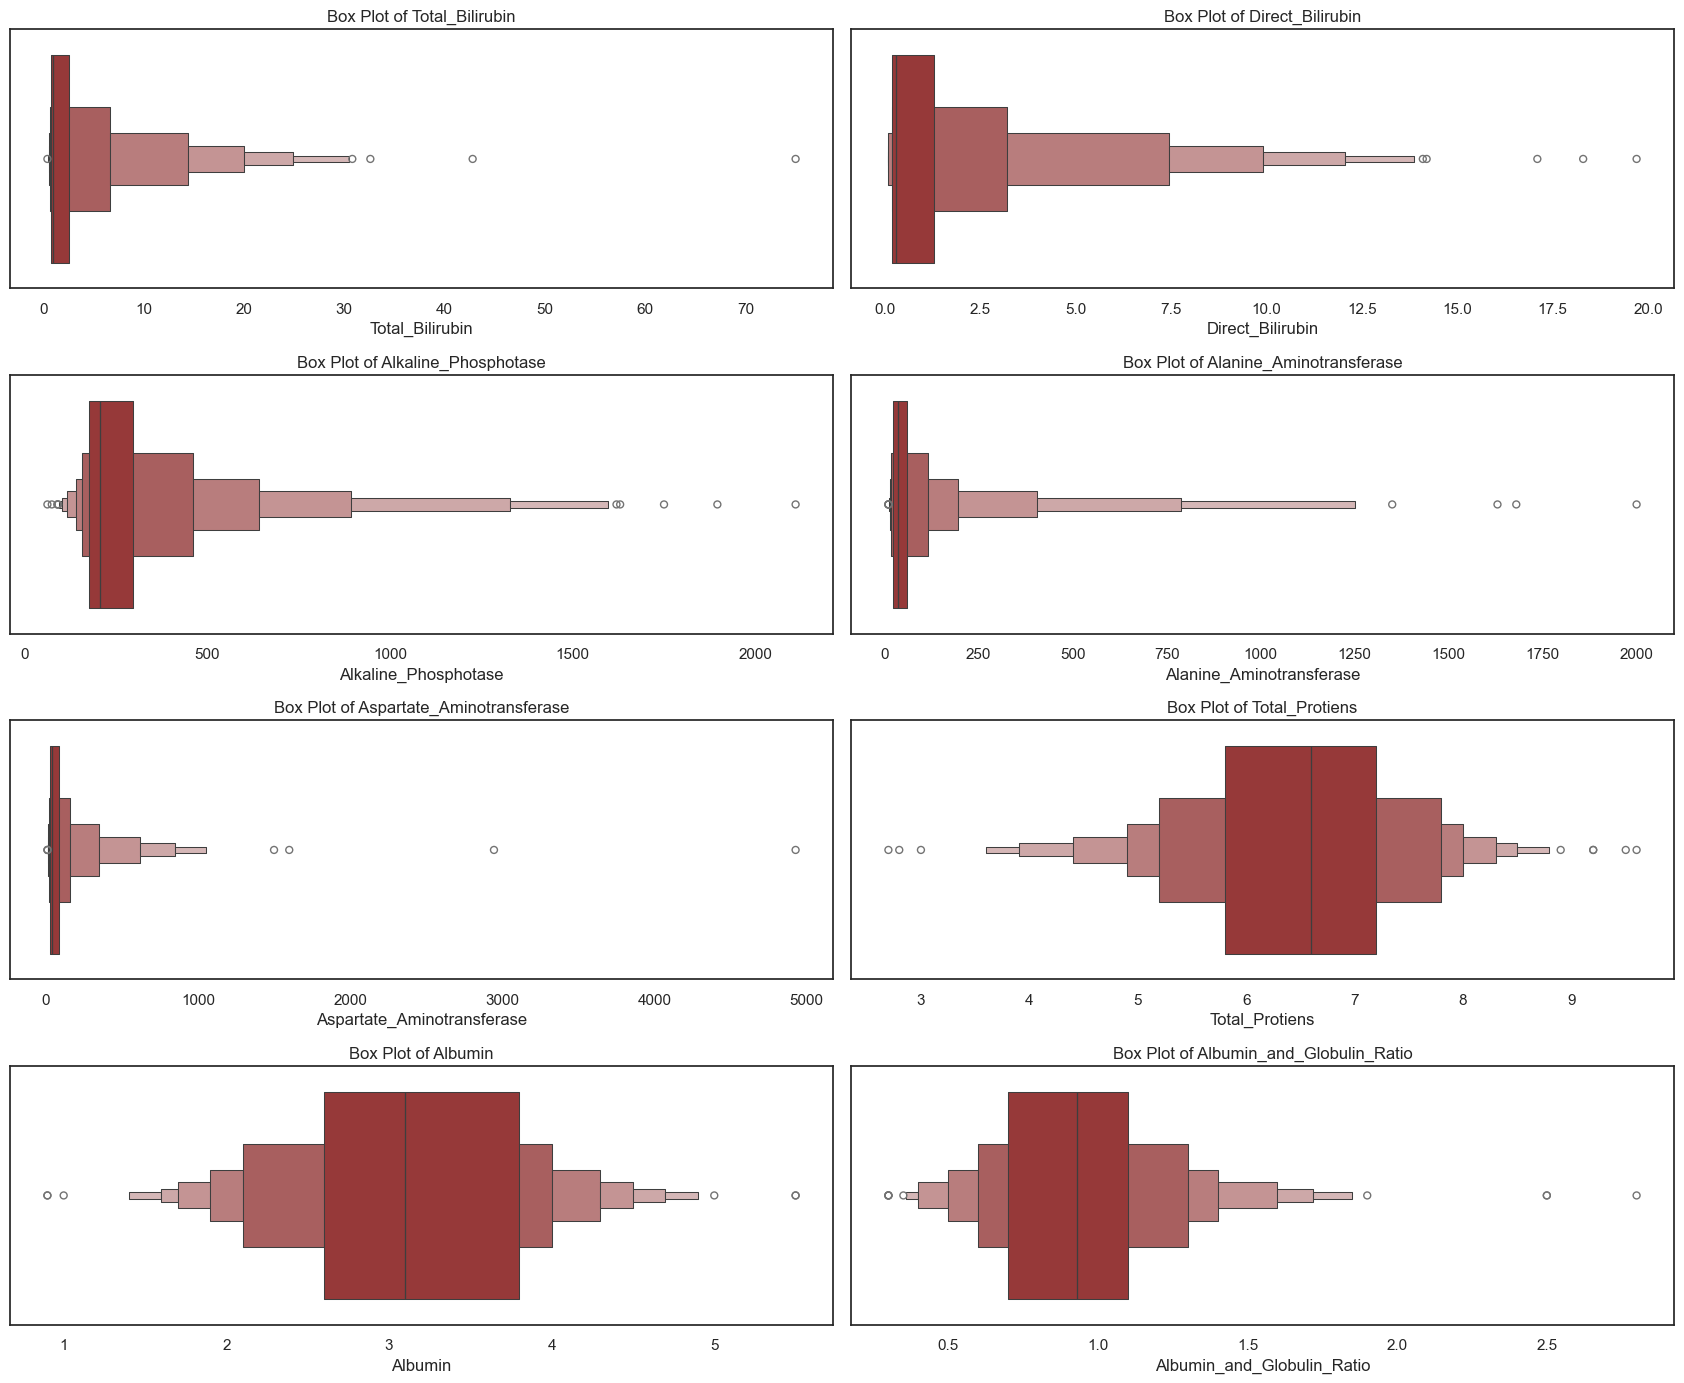

In [37]:
# check the Outliers in dataset
# now check every feature distribuion

cols = ["Total_Bilirubin","Direct_Bilirubin","Alkaline_Phosphotase","Alanine_Aminotransferase","Aspartate_Aminotransferase","Total_Protiens", 
        "Albumin", "Albumin_and_Globulin_Ratio"]


plt.figure(
    figsize=(17,14)
)

for i,cols in enumerate(cols):
    plt.subplot(4,2,(i+1))
    plt.title(f"Box Plot of {cols}")
    sns.boxenplot(
    data = df,
    x = cols,
    color='brown'
#     hue='Selector',
#     palette=['navy','darkgreen']
    )
    
plt.tight_layout()
plt.show()

In [30]:
numerical_features = ['Age', "Total_Bilirubin","Direct_Bilirubin","Alkaline_Phosphotase","Alanine_Aminotransferase","Aspartate_Aminotransferase","Total_Protiens", 
        "Albumin", "Albumin_and_Globulin_Ratio"]
print(f'Total numerical features = {len(numerical_features)}')

Total numerical features = 9


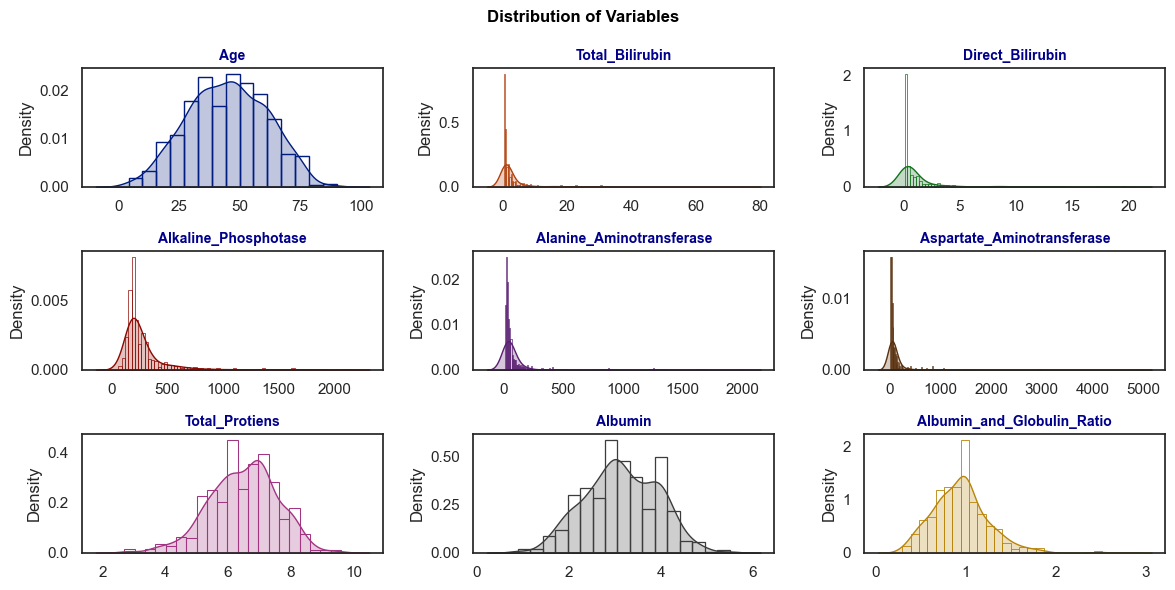

In [36]:
sns.set_style("white")

colors = sns.color_palette(palette = 'dark', n_colors = len(numerical_features))

fig,axs = plt.subplots(nrows = 3, ncols = 3, figsize = (12, 6))
axs = axs.flat

for i,num_feat in enumerate(numerical_features):
    sns.kdeplot(df, x = num_feat, fill = True, color = colors[i], ax = axs[i])
    sns.histplot(df, x = num_feat, stat = 'density', fill = False, color = colors[i], ax = axs[i])
    axs[i].set_xlabel("")
    axs[i].set_title(num_feat, fontsize = 10, fontweight = 'bold', color = 'darkblue')

fig.suptitle("Distribution of Variables", fontsize = 12, fontweight = 'bold', color = 'black')
fig.tight_layout()
fig.show()

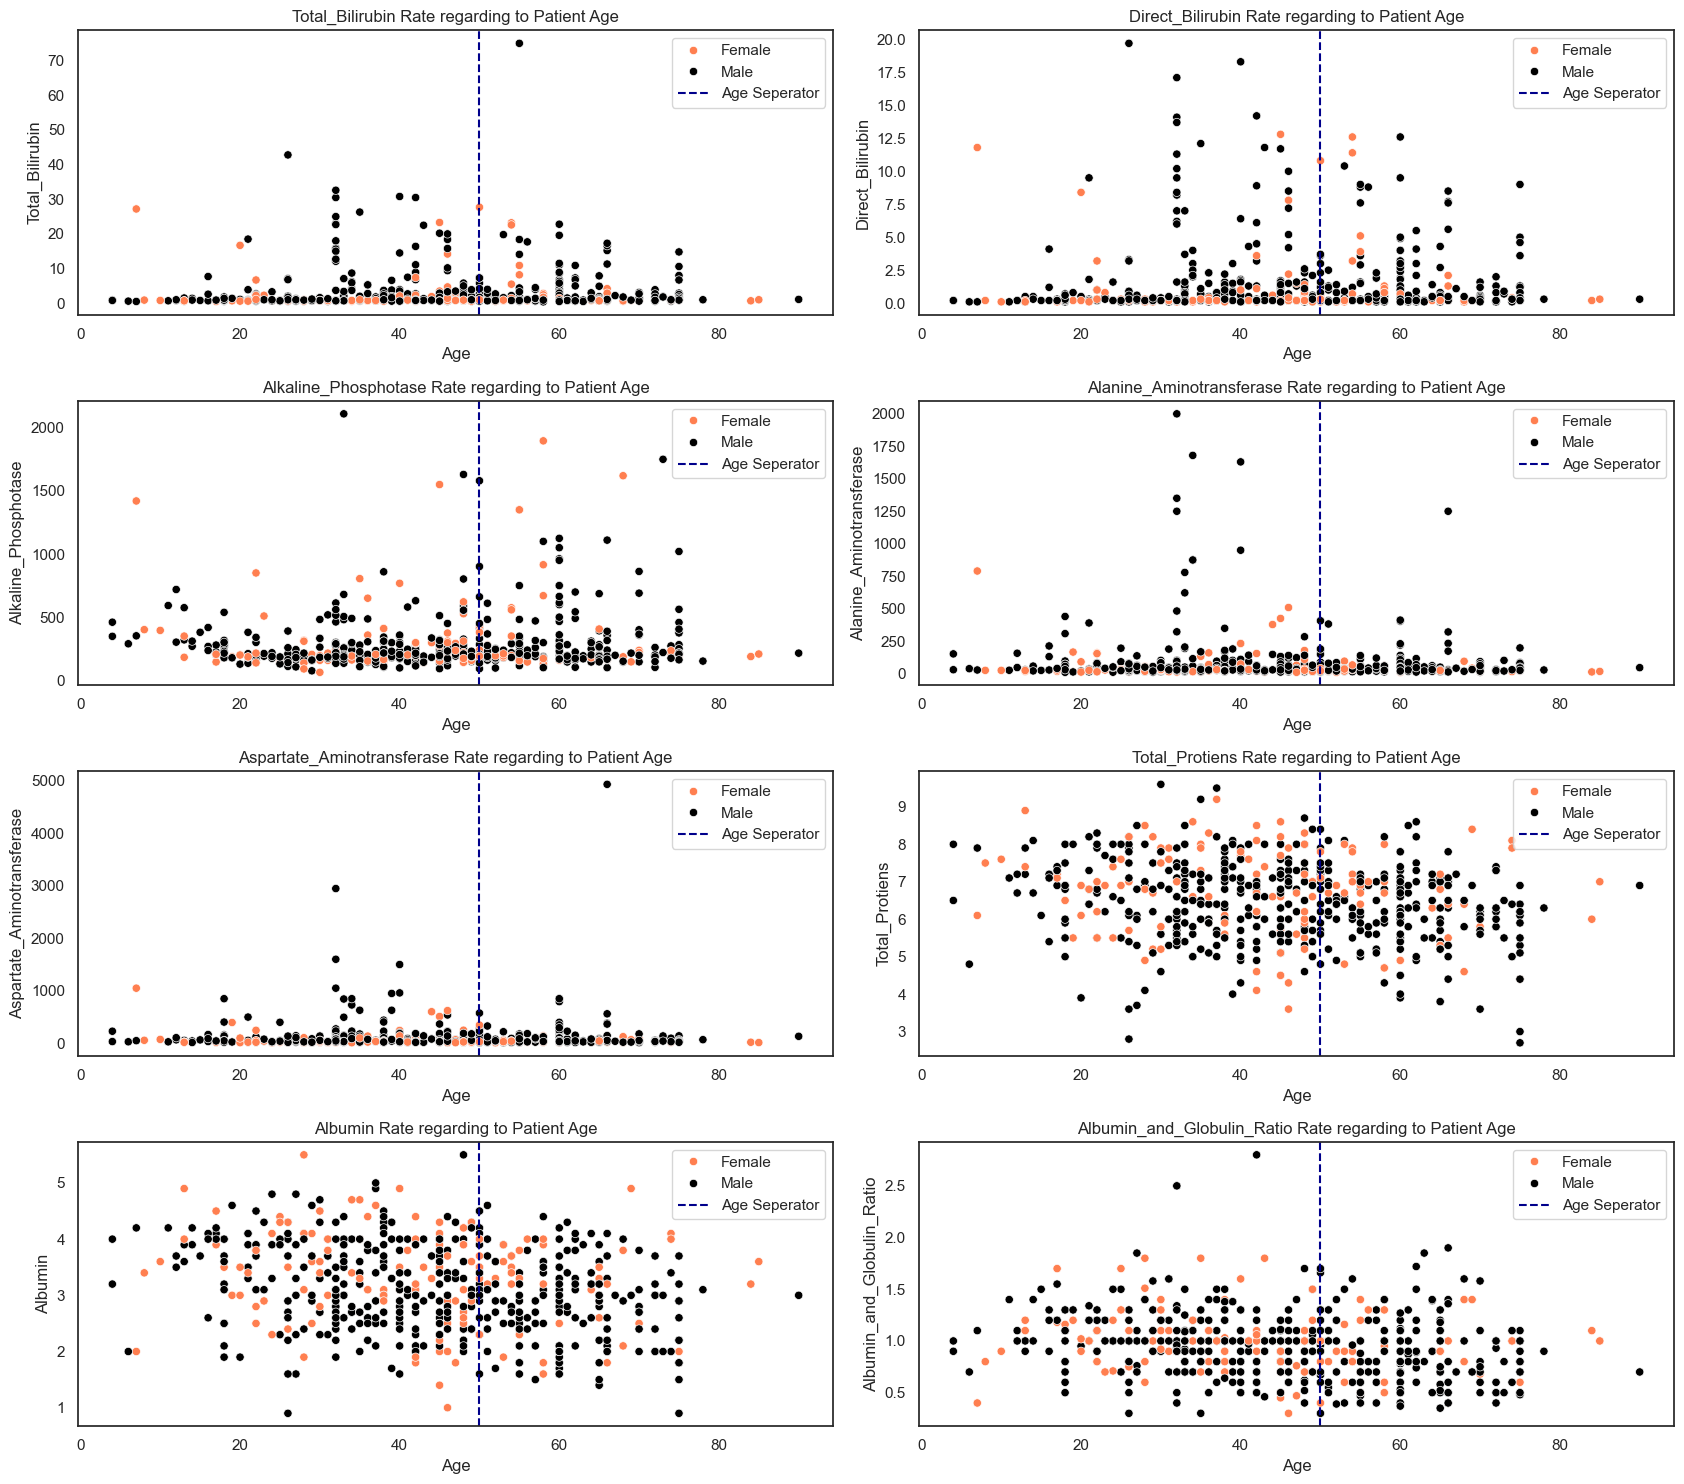

In [38]:
# Age Scatters

cols = ["Total_Bilirubin","Direct_Bilirubin","Alkaline_Phosphotase","Alanine_Aminotransferase","Aspartate_Aminotransferase","Total_Protiens", 
        "Albumin", "Albumin_and_Globulin_Ratio"]

plt.figure(
    figsize=(17,15)
)

for i,cols in enumerate(cols):
    plt.subplot(4,2,(i+1))
    plt.title(f'{cols} Rate regarding to Patient Age')
    sns.scatterplot(
    data = df,
    x = 'Age',
    y = cols,
    hue='Gender',
    palette=['coral','black']
    )
    
    plt.axvline(
        x=50,
        linestyle='--',
        color='darkblue',
        label='Age Seperator'
    )

    plt.legend()  
    
plt.tight_layout()
plt.show()

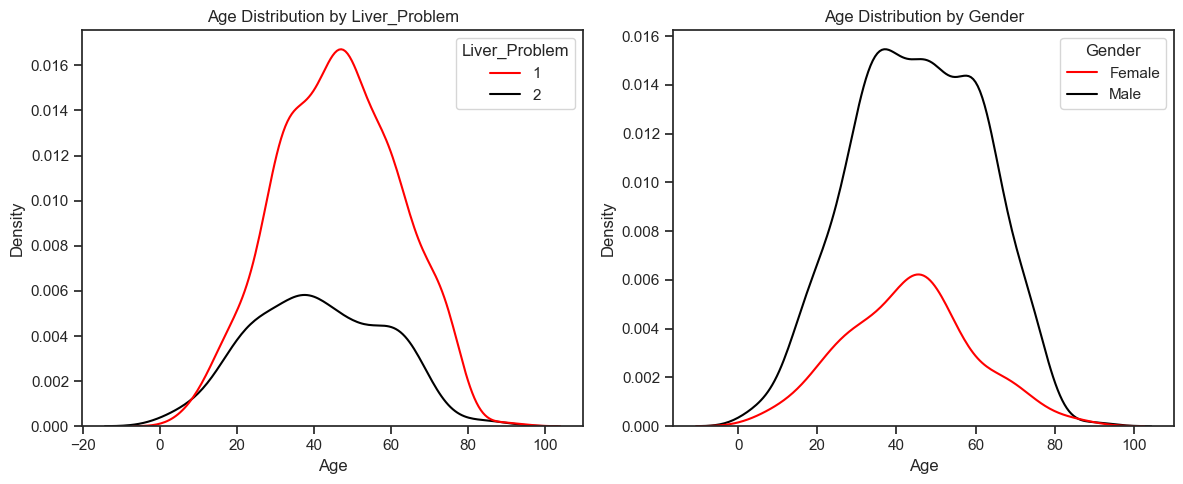

In [19]:
# Age distribution

col = ['Liver_Problem','Gender']

plt.figure(
    figsize=(12,5)
)

for i,cols in enumerate(col):
    plt.subplot(1,2,(i+1))
    plt.title(f'Age Distribution by {cols}')
    sns.kdeplot(
    data = df,
    x = 'Age',
    hue=cols,
    palette=['Red','black']
    )
    
plt.tight_layout()
plt.show()


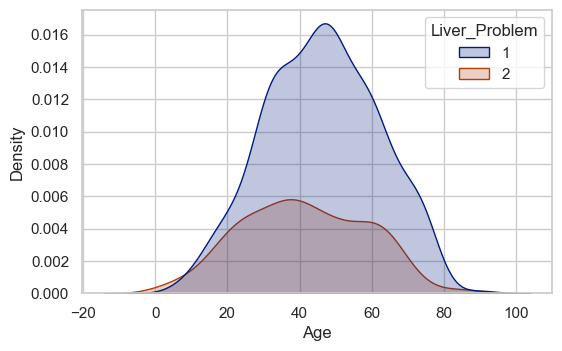

In [45]:
sns.set_style('whitegrid')

fig,ax = plt.subplots(figsize = (5.4,3.5))
sns.kdeplot(df, x = 'Age', hue = 'Liver_Problem', fill = True, palette = 'dark', ax = ax)
fig.show()

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (583, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Age,int64,0.000000,12,4.000000,90.000000,No issue
Gender,object,0.000000,0,,,No issue
Total_Bilirubin,float64,0.000000,NA,0.400000,75.000000,Column has 83 outliers greater than upper bound (5.30) or lower than lower bound(-1.90). Cap them or remove them.
Direct_Bilirubin,float64,0.000000,NA,0.100000,19.700000,"Column has 80 outliers greater than upper bound (2.95) or lower than lower bound(-1.45). Cap them or remove them., Column has a high correlation with ['Total_Bilirubin']. Consider dropping one of them."
Alkaline_Phosphotase,int64,0.000000,46,63.000000,2110.000000,Column has 69 outliers greater than upper bound (481.00) or lower than lower bound(-7.00). Cap them or remove them.
Alanine_Aminotransferase,int64,0.000000,26,10.000000,2000.000000,Column has 72 outliers greater than upper bound (115.50) or lower than lower bound(-32.50). Cap them or remove them.
Aspartate_Aminotransferase,int64,0.000000,31,10.000000,4929.000000,Column has 66 outliers greater than upper bound (179.38) or lower than lower bound(-67.62). Cap them or remove them.
Total_Protiens,float64,0.000000,NA,2.700000,9.600000,Column has 8 outliers greater than upper bound (9.30) or lower than lower bound(3.70). Cap them or remove them.
Albumin,float64,0.000000,NA,0.900000,5.500000,No issue
Albumin_and_Globulin_Ratio,float64,0.701754,NA,0.300000,2.800000,"4 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 10 outliers greater than upper bound (1.70) or lower than lower bound(0.10). Cap them or remove them."


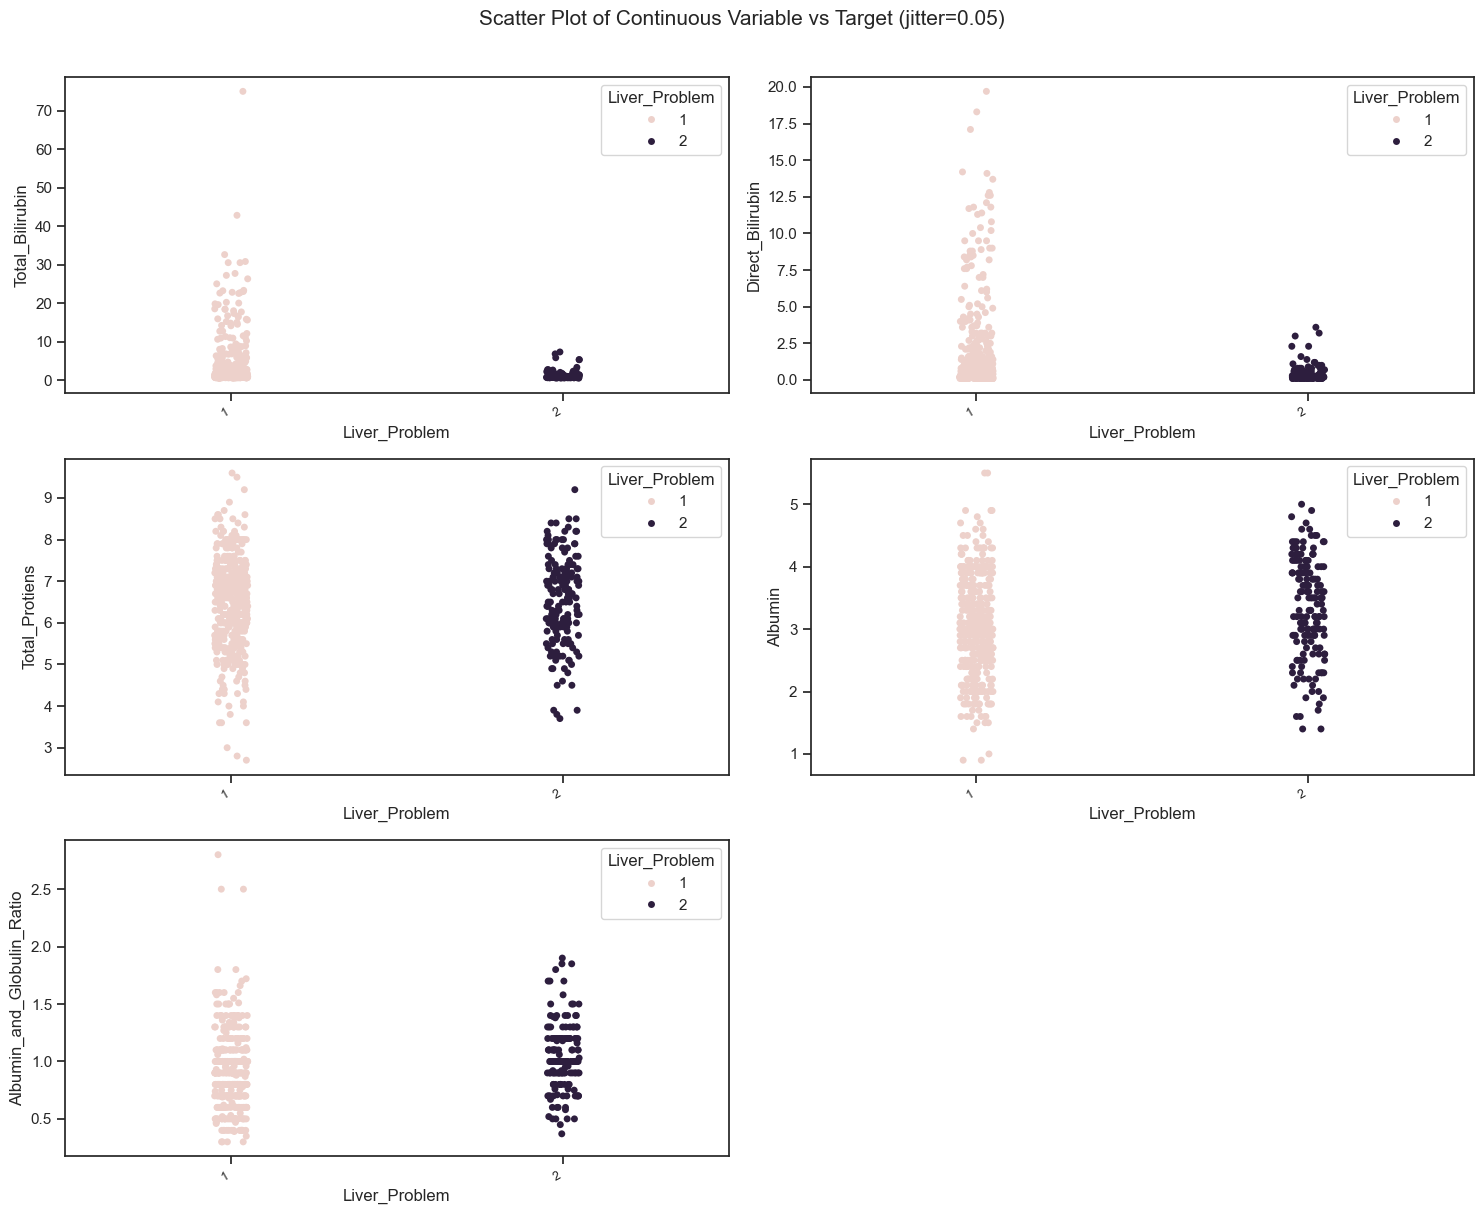

Total Number of Scatter Plots = 15


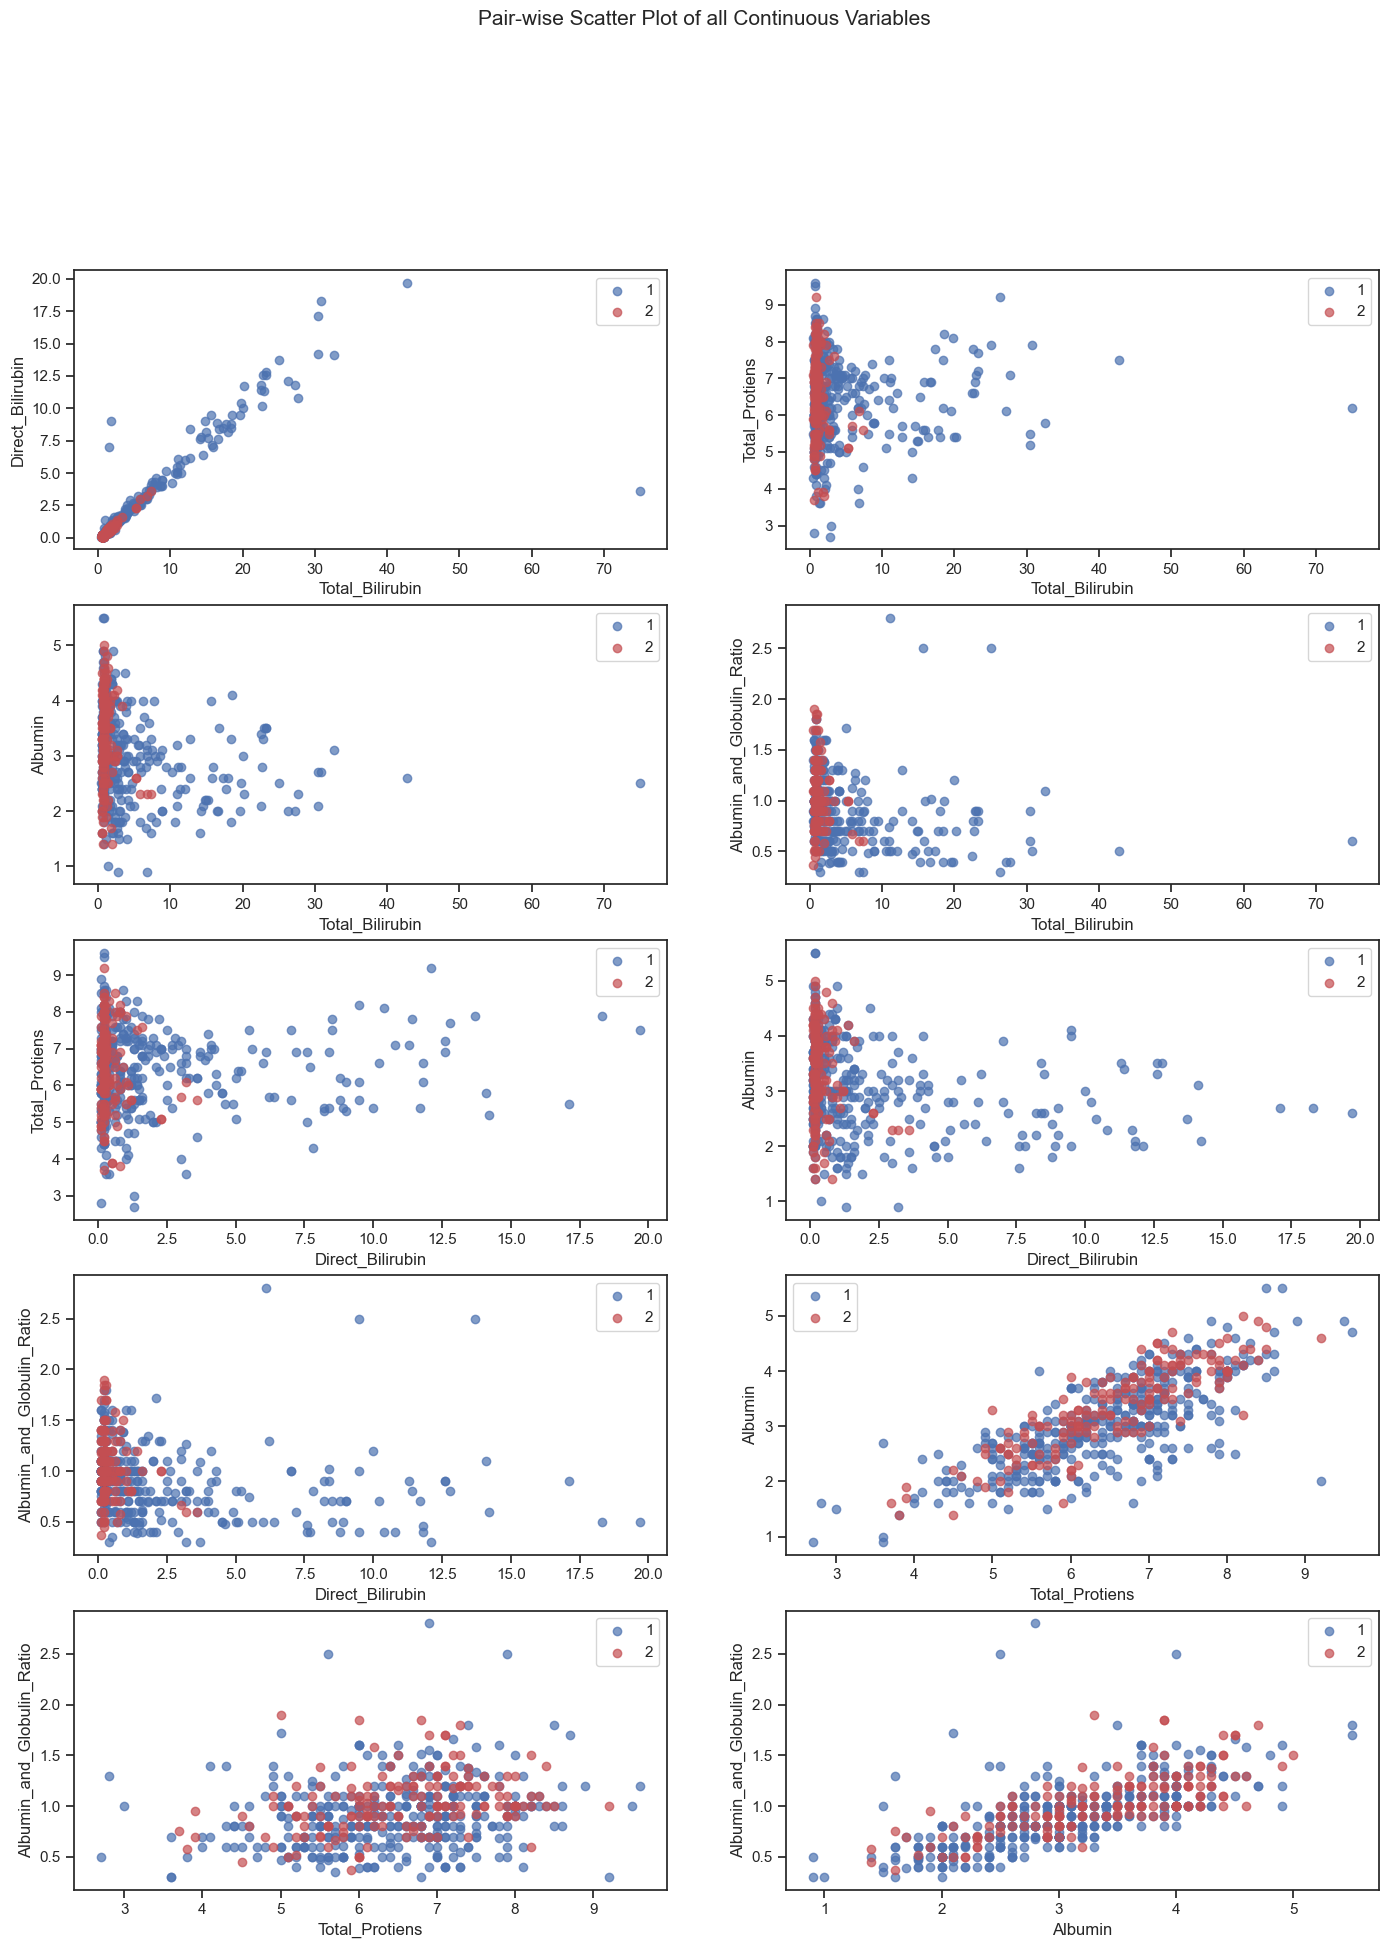

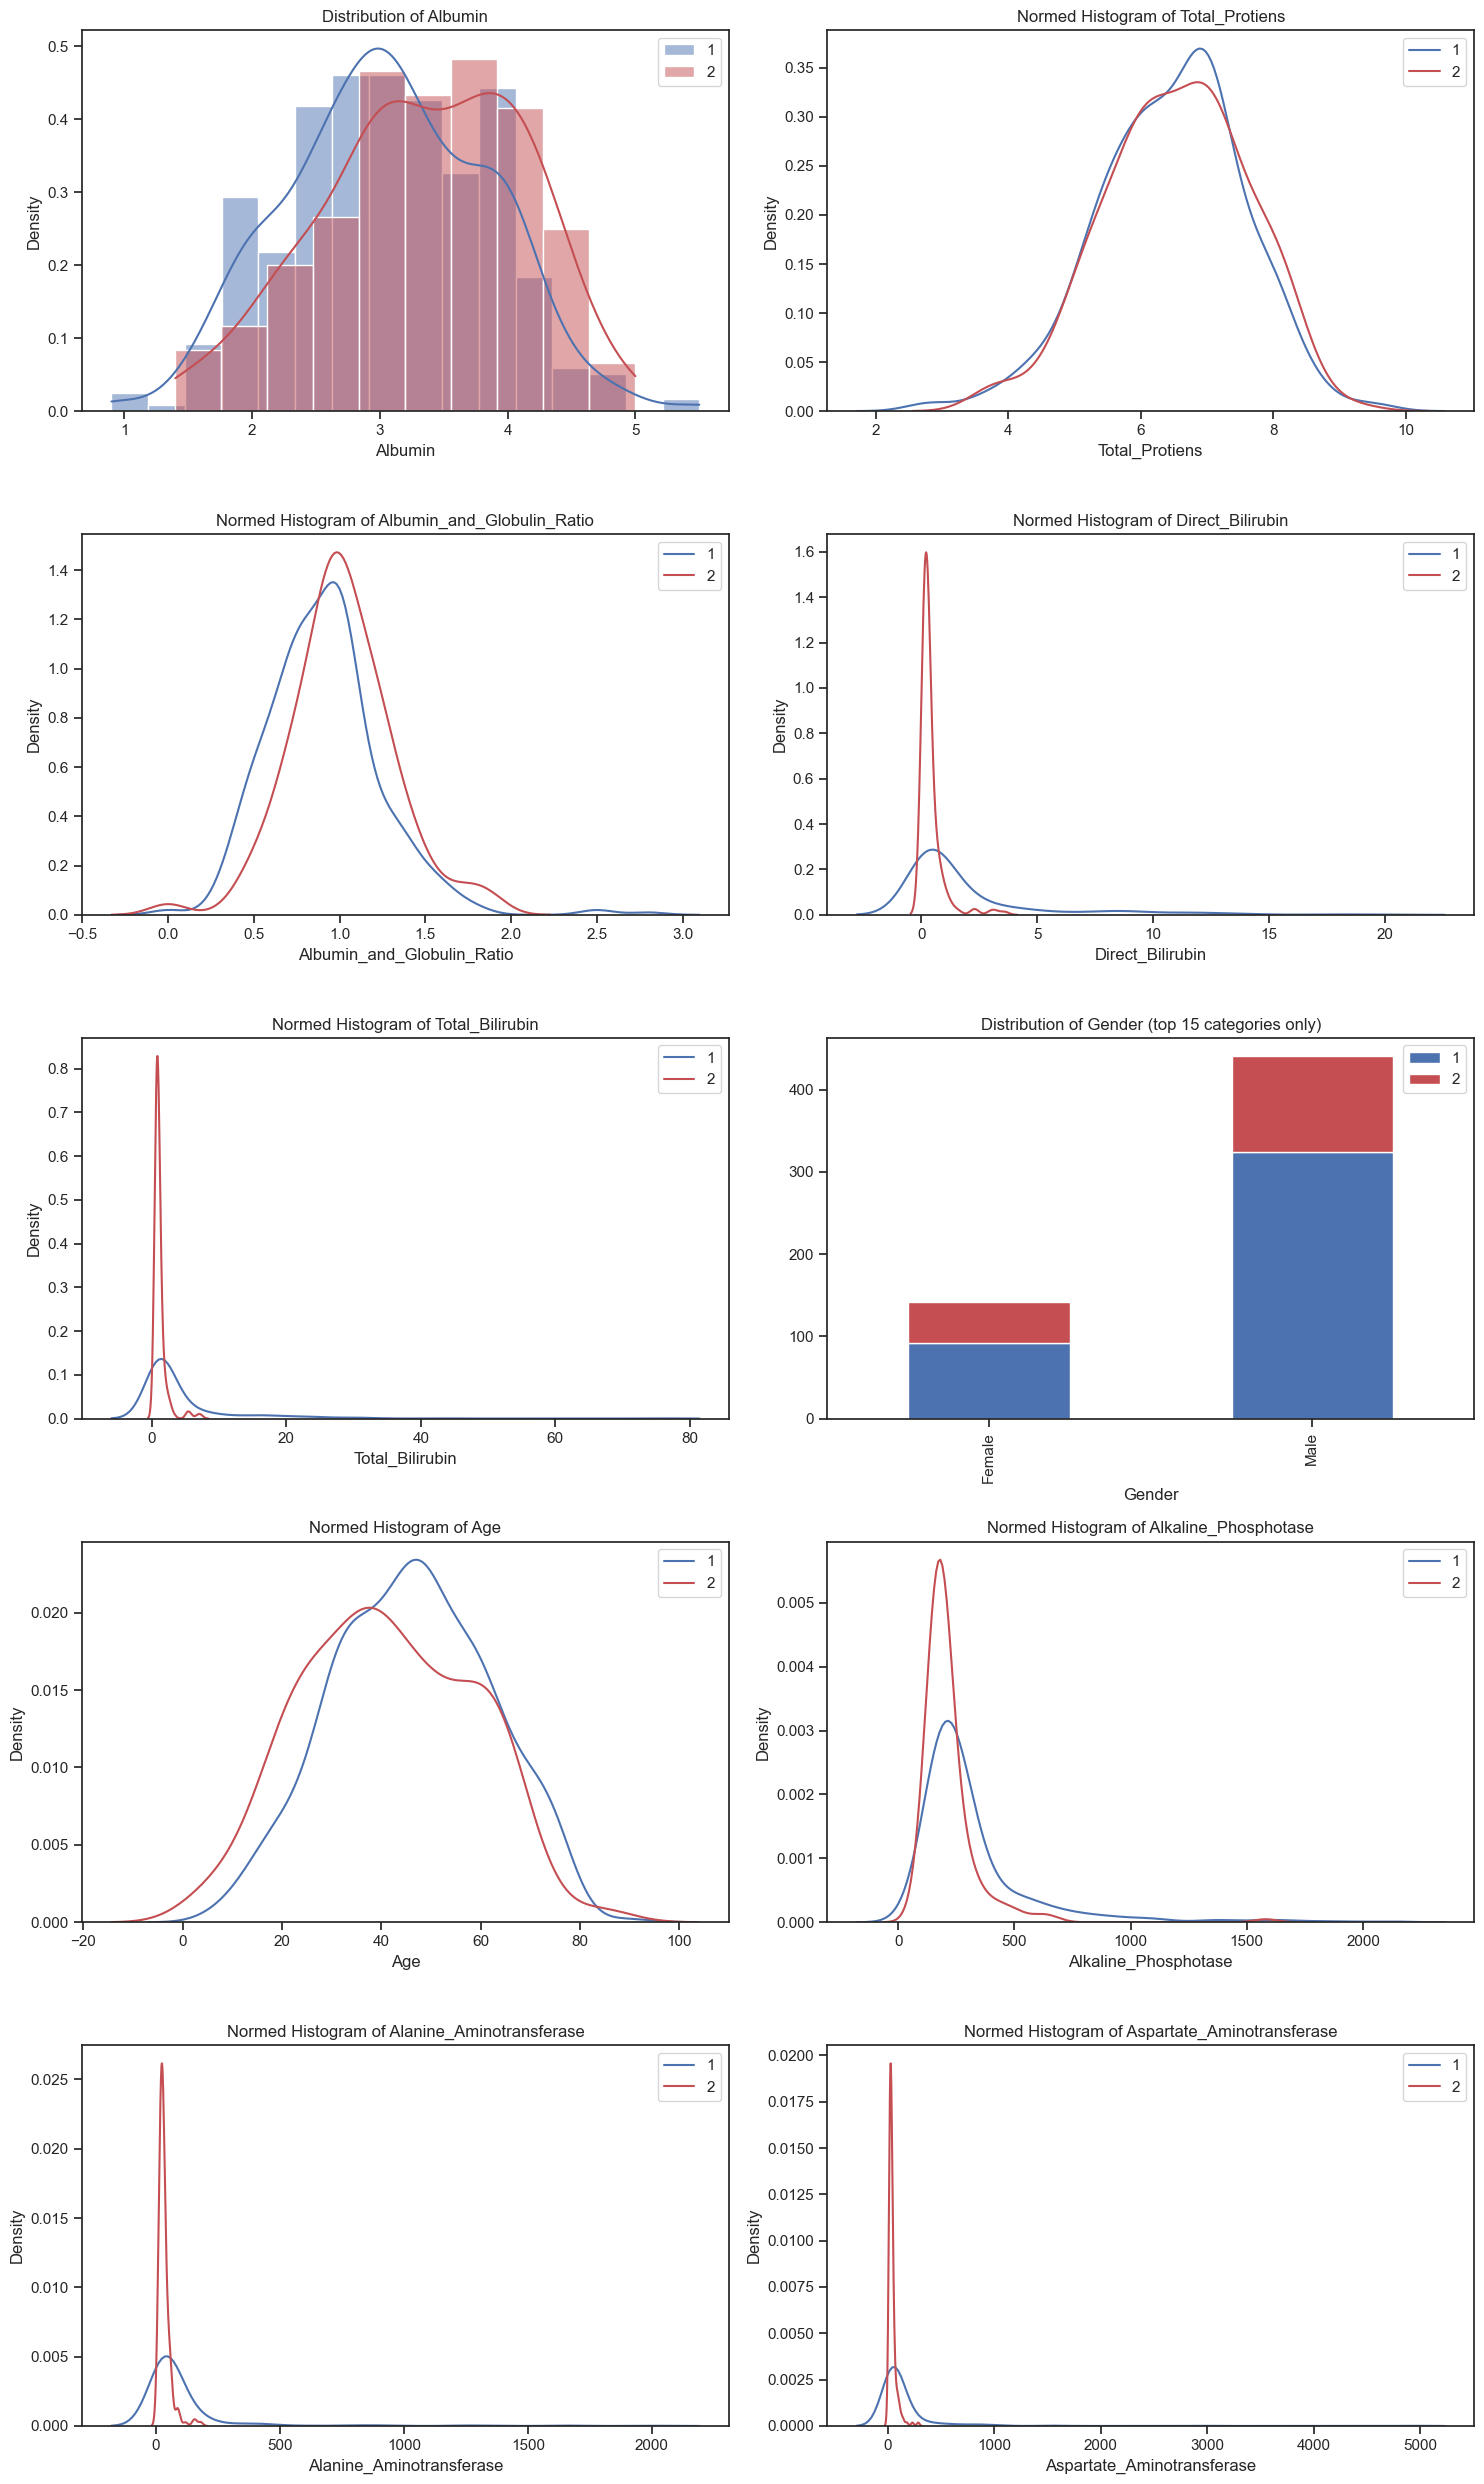

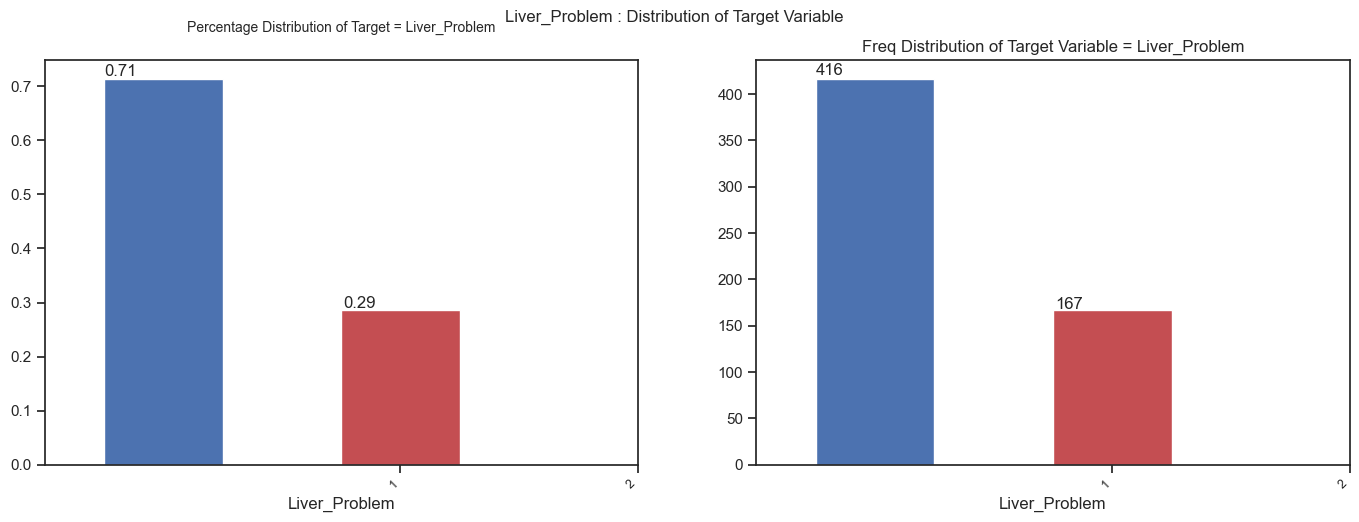

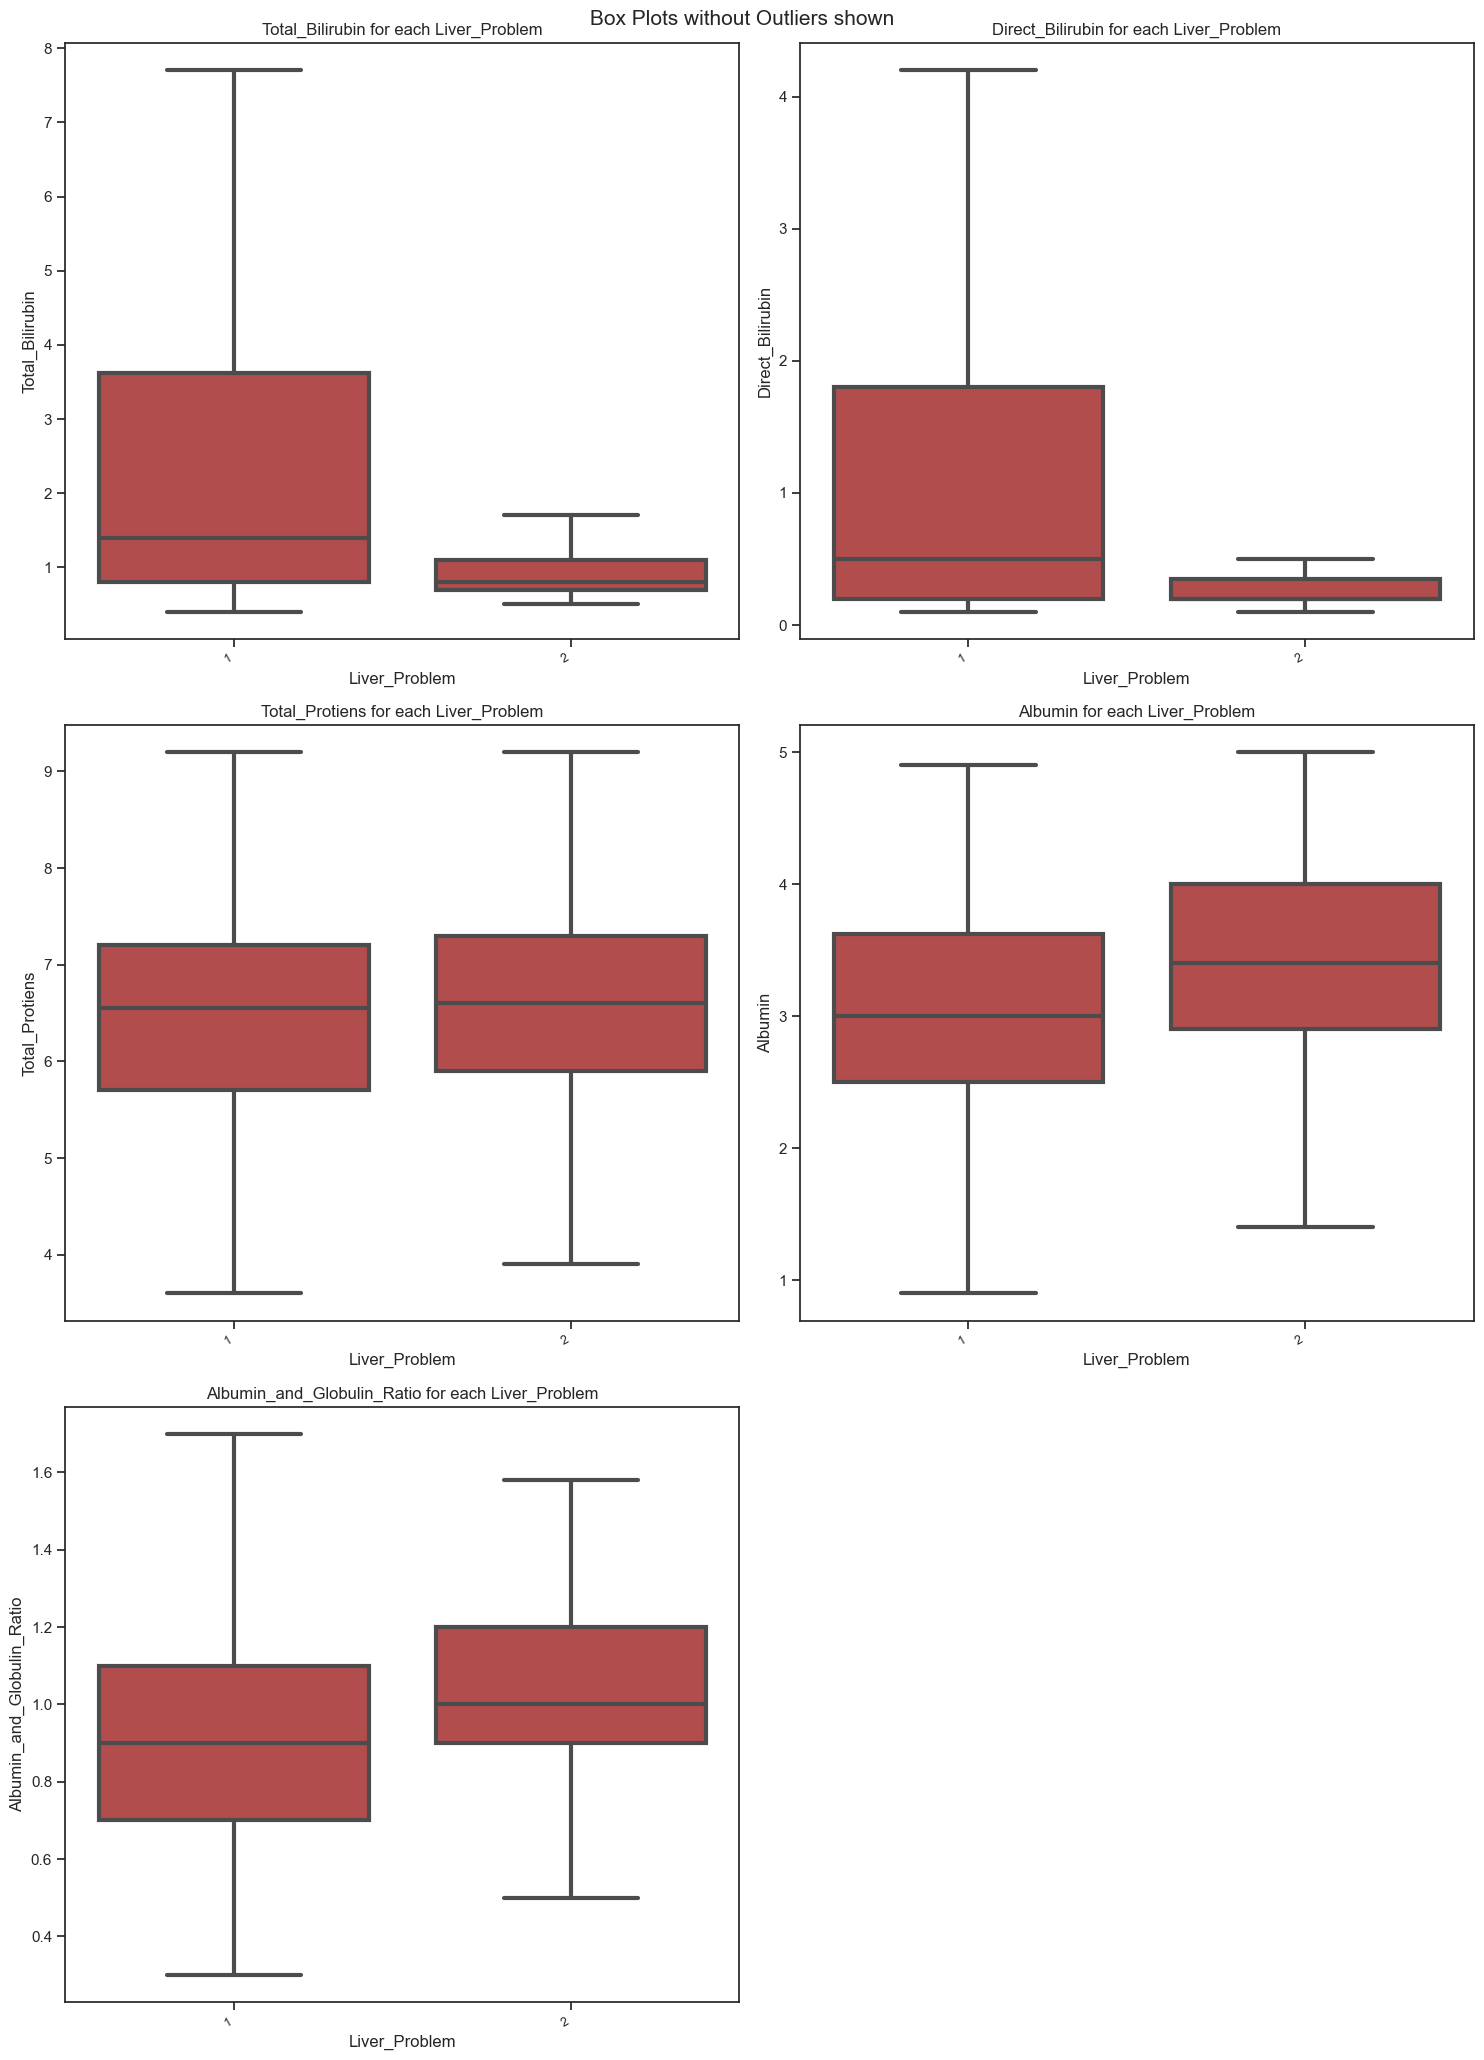

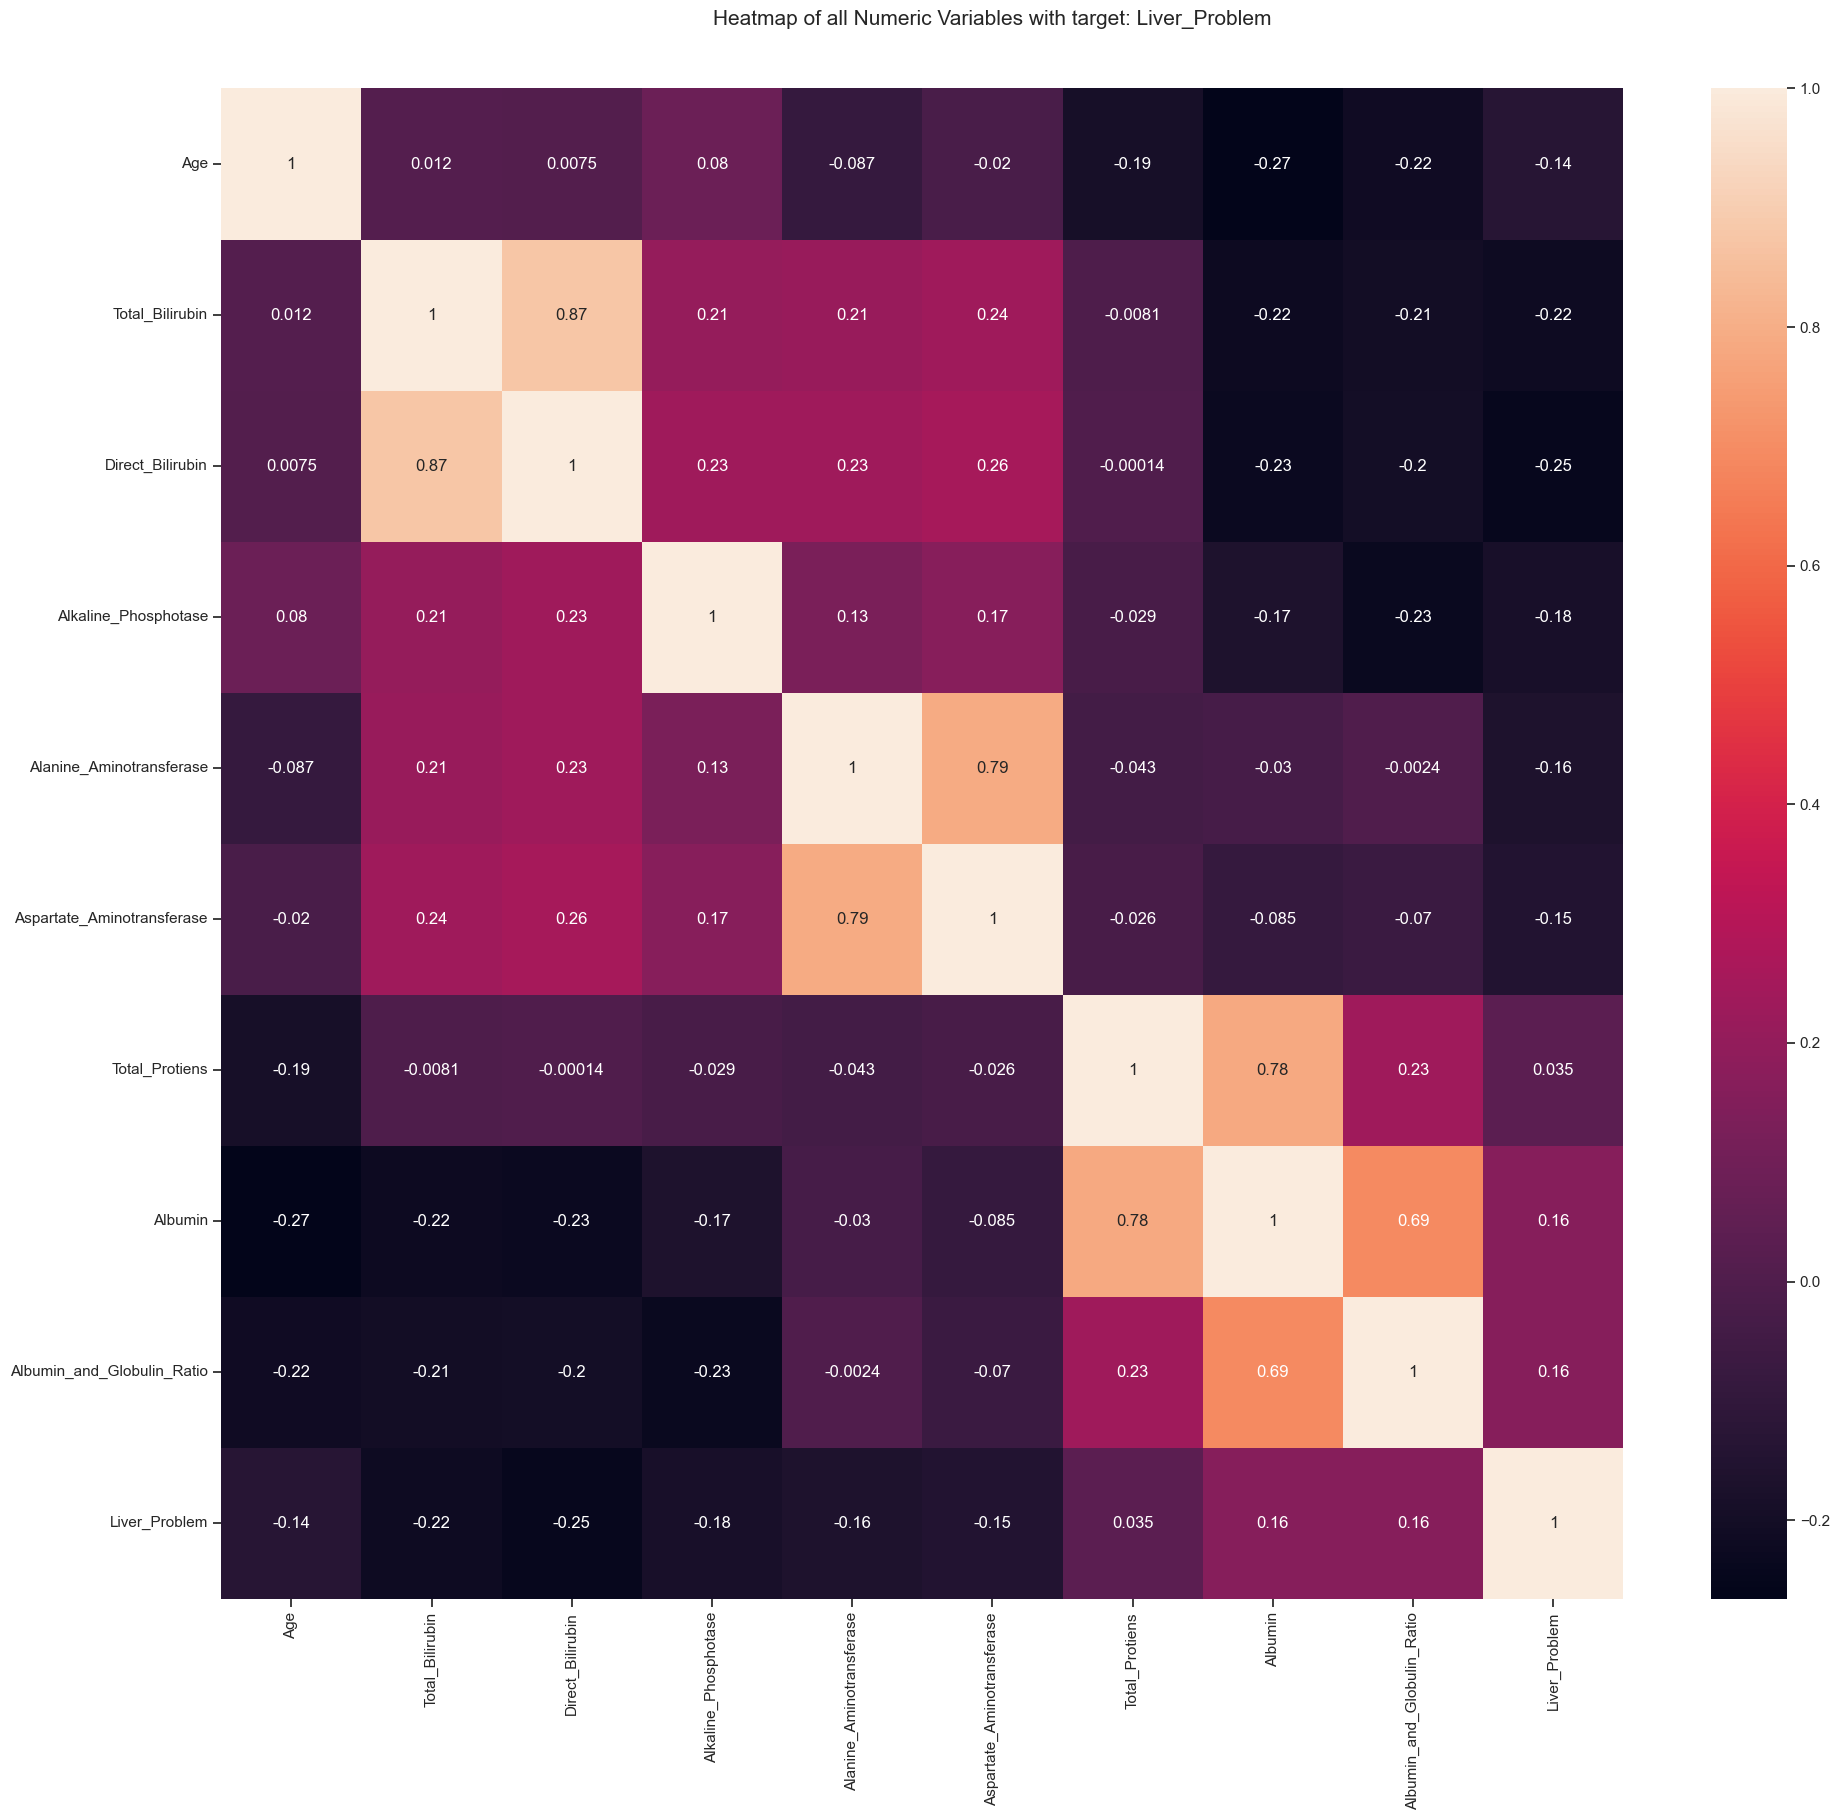

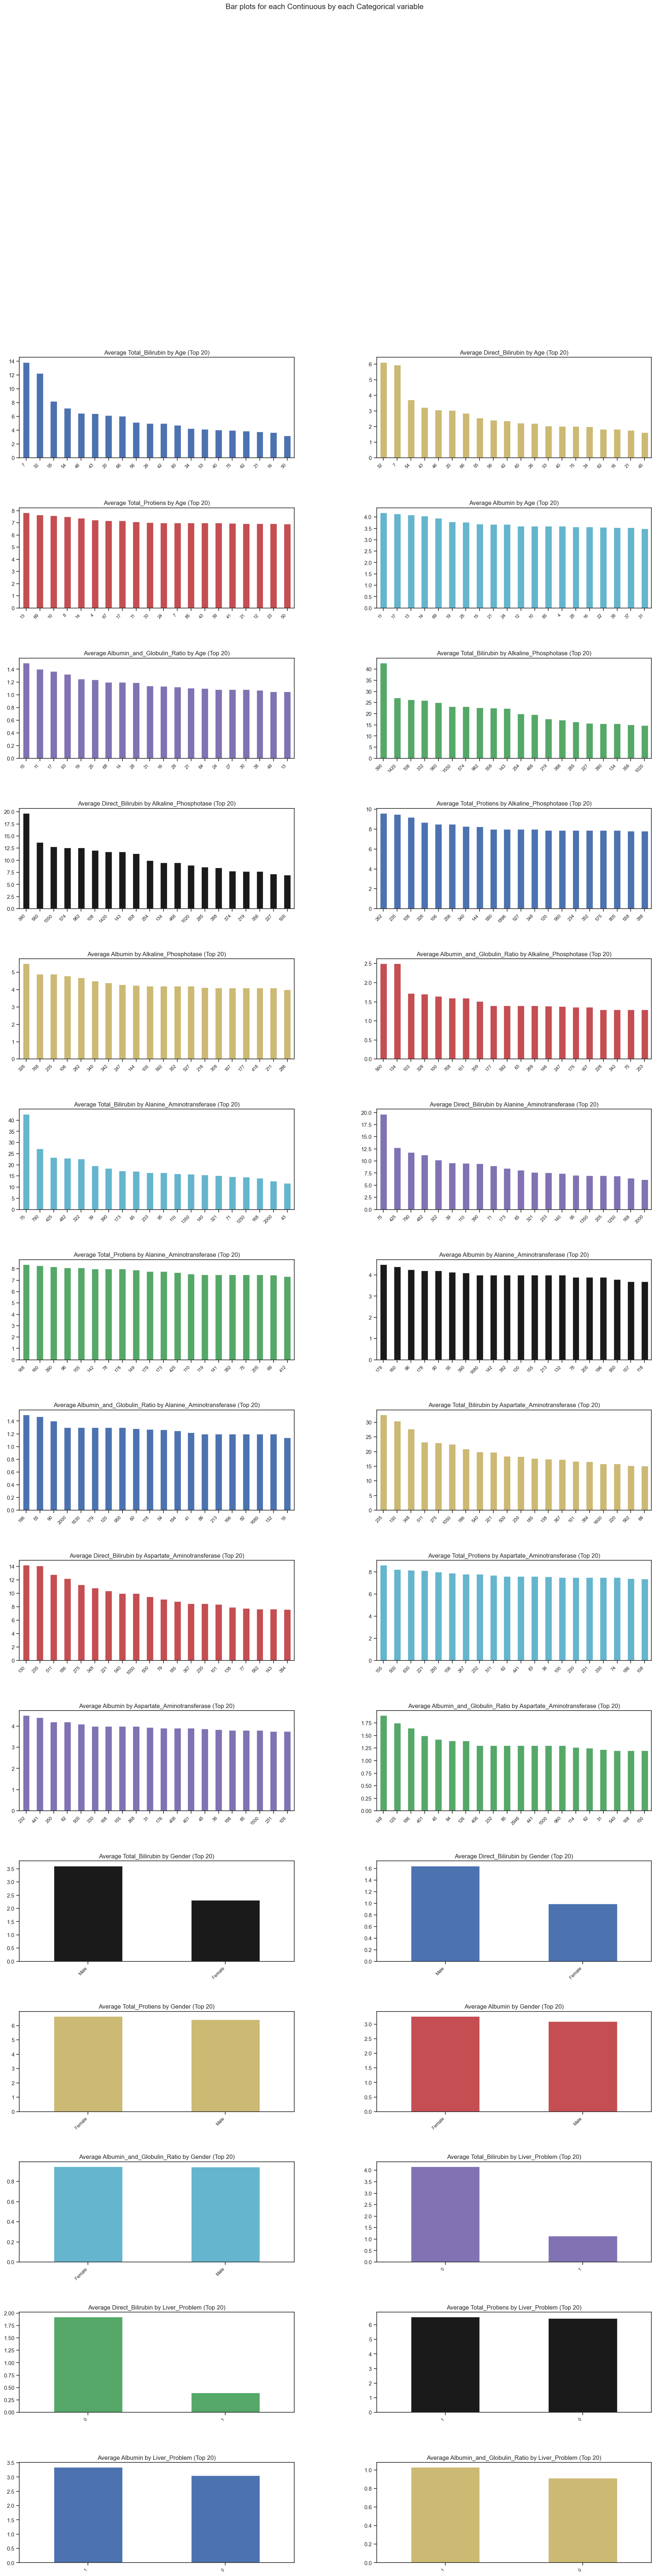

All Plots done
Time to run AutoViz = 9 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
246,55,Male,1.8,9.0,272,22,79,6.1,2.7,0.70,0
92,60,Male,8.6,4.0,298,412,850,7.4,3.0,0.60,0
386,38,Male,2.7,1.4,105,25,21,7.5,4.2,1.20,1
186,60,Male,3.2,1.8,750,79,145,7.8,3.2,0.69,0
389,72,Male,0.6,0.1,102,31,35,6.3,3.2,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...
277,60,Male,2.0,0.8,190,45,40,6.0,2.8,0.80,0
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,0
359,69,Female,0.8,0.2,146,42,70,8.4,4.9,1.40,1
192,60,Male,2.3,0.6,272,79,51,6.6,3.5,1.10,0


In [5]:
from autoviz.AutoViz_Class import AutoViz_Class

%matplotlib inline
AV = AutoViz_Class()
AV.AutoViz(filename='',dfte=df,depVar='Liver_Problem',verbose=1,max_rows_analyzed=df.shape[0]
               ,max_cols_analyzed=df.shape[1])